<a href="https://colab.research.google.com/github/Jameslorry6666/Micheal.iml/blob/master/Copy_of_NNtask_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               628000    
                                                                 
 dense_1 (Dense)             (None, 10)                8010      
                                                                 
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
240/240 - 19s - loss: 0.3119 - accuracy: 0.9103 - val_loss: 0.1535 - val_accuracy: 0.9582 - 19s/epoch - 79ms/step
Epoch 2/25
240/240 - 9s - loss: 0.1243 - accuracy: 0.9642 - val_loss: 0.1154 - val_accuracy: 0.9666 - 9s/epoch - 36ms/step
Epoch 3/25
240/240 - 6s - loss: 0.0821 - accuracy: 0.9761 - val_loss: 0.1009 - val_

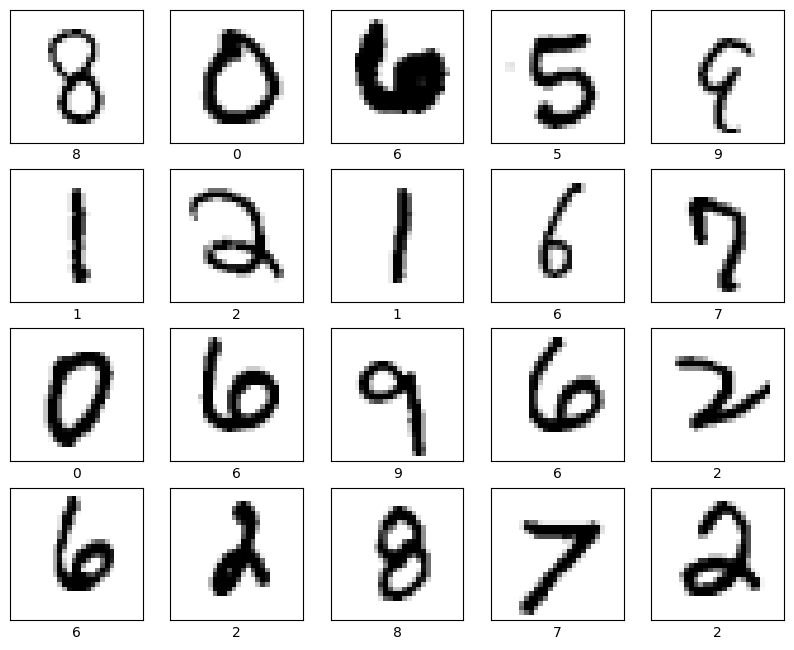

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

import numpy as np
import random
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import matplotlib.pyplot as plt


 # Read and view the dataset
(x_train , y_train ), (x_test , y_test ) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

#Output part of the training images and their corresponding labels.
image_number = random.randint (0, len ( x_train ) - 20)
plt.figure ( figsize =(10,10))
for i in range( image_number , image_number + 20):
 plt.subplot (5,5,i-image_number + 1)
 plt.xticks ([])
 plt.yticks ([])
 plt.grid (False)
 plt.imshow ( x_train [ i ], cmap = plt.cm.binary )
 plt.xlabel ( y_train [ i ])


#Convert data from matrix to vector representation
x_train = x_train.reshape ( 60000 , 784)
x_test = x_test.reshape ( 10000 , 784)

# Perform Data Normalization
x_train = x_train.astype ('float32')
x_test = x_test.astype ('float32')
x_train /= 255
x_test /= 255

y_train = np_utils.to_categorical ( y_train , 10)
y_test = np_utils.to_categorical ( y_test , 10 )


model = tf.keras.Sequential()
from keras.layers import Dense
from keras.utils import np_utils

model.add(
   Dense(800, input_dim =784, activation="relu", 
kernel_initializer ="normal"))
model.add(
    Dense(10, activation="softmax", 
kernel_initializer ="normal"))


model.summary()

model.compile(optimizer ="adam", 
              loss ="categorical_crossentropy", 
              metrics= ["accuracy"]) 

history = model.fit ( x_train ,
 y_train ,
batch_size =200,
epochs=25,
 validation_split =0.2, verbose=2)


In [ ]:
model.save ('Model_MNIST_PNN.hdf5')

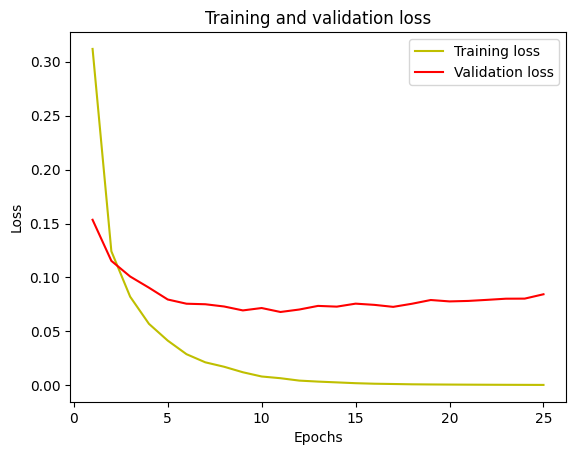

In [ ]:
loss = history.history ['loss']
val_loss = history.history ['val_loss']
epochs = range( 1, len (loss) + 1)
plt.plot (epochs, loss, 'y', label='Training loss')
plt.plot (epochs, val_loss , 'r', label='Validation loss')
plt.title ('Training and validation loss')
plt.xlabel ('Epochs')
plt.ylabel ('Loss')
plt.legend ()
plt.show ()

In [ ]:
scores = model.evaluate ( x_test , y_test , verbose=0)
print( "Test score: %f" % scores[0])
print( "Test accuracy: %f" % scores[1])

Test score: 0.069126
Test accuracy: 0.983300


In [ ]:
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,multilabel_confusion_matrix,confusion_matrix

# Function For estimates models classification
def compute_evaluation_metric ( model, x_test , y_test , y_predicted , y_predicted_prob ):
  print(y_predicted)
  print(y_test)
  print( "\n Accuracy Score : \n ", accuracy_score ( y_test,y_predicted ))
  print( "\n AUC Score : \n", roc_auc_score ( y_test , y_predicted_prob ))
  print( "\n Confusion Matrix : \n ", multilabel_confusion_matrix ( y_test , y_predicted ))
  print( "\n Classification Report : \n", classification_report ( y_test , y_predicted ))
 
y_predicted_prob = model.predict ( x_test )
y_predicted = ( y_predicted_prob > 0.5 ). astype (int)
compute_evaluation_metric ( model, x_test , y_test , 
y_predicted , y_predicted_prob )

313/313 [==============================] - 1s 4ms/step
[[0 0 0 ... 1 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

 Accuracy Score : 
  0.9829

 AUC Score : 
 0.9997662334738584

 Confusion Matrix : 
  [[[9002   18]
  [   8  972]]

 [[8852   13]
  [   7 1128]]

 [[8949   19]
  [  18 1014]]

 [[8977   13]
  [  18  992]]

 [[9002   16]
  [  18  964]]

 [[9097   11]
  [  17  875]]

 [[9029   13]
  [  16  942]]

 [[8954   18]
  [  19 1009]]

 [[9010   16]
  [  22  952]]

 [[8970   21]
  [  28  981]]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.98   

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# New Section